## Trabalho CPE722 - Método Nãp-Supervisionado 

Autor: Micael Veríssimo de Araújo

e-mail: micaelvero@hotmail.com

Utilizar um método não-supervisionado exposto em sala na tentativa de obter uma classificação sinal (Higgs) e background ($t\overline{t}$) no canal $WH \to l \nu b \overline{b}$

In [1]:
# import all necessay library
%time
import numpy as np
from numpy import linalg as LA
from functions import ClusterMerits, AuxiliarFunctions
from sklearn import preprocessing
from sklearn.datasets.samples_generator import make_blobs
from scipy.stats import norm
import matplotlib.mlab as mlab
from sklearn import preprocessing
from sklearn import metrics
import joblib

from sklearn import cross_validation
from sklearn.cluster import KMeans

from pandas_ml import ConfusionMatrix

import matplotlib.pyplot as plt
%matplotlib inline

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.96 µs


/home/micael/.virtualenvs/MyAnalysis/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# load the data and little data
%time
data_path = '/home/micael/MyWorkspace/DATA'
path_tosave = data_path+'/'+'Plots'
signal = np.load(data_path+'/'+'lvbb125Matrix.npy')[0:5000,:]
signal_scd = preprocessing.scale(signal)
signal_part = np.load(data_path+'/'+'lvbb125Matrix.npy')[0:250,:]
signal_trgt = np.ones(signal.shape[0])


ttbar = np.load(data_path+'/'+'TTbarMatrix.npy')
ttbar_scd = preprocessing.scale(ttbar)
ttbar_part = np.load(data_path+'/'+'TTbarMatrix.npy')[0:250,:]
bkg = ttbar
bkg_trgt = np.zeros(bkg.shape[0])

data = np.append(signal,bkg,axis=0)
data_scd = np.append(signal_scd,ttbar_scd,axis=0)

little_data = np.append(signal_part,ttbar_part,axis=0)

trgt = np.append(signal_trgt,bkg_trgt,axis=0)#signal_scd
trgt2 = trgt[:,np.newaxis] 
trgt2.shape
#sinal_e_trgt.shape
#signal.shape
#sinal_e_trgt[:,24]
data_trgt = np.append(data,trgt2,axis=1)
data_trgt[:,24]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.01 µs


array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

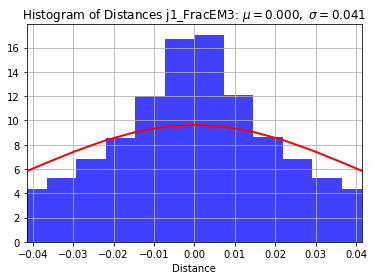

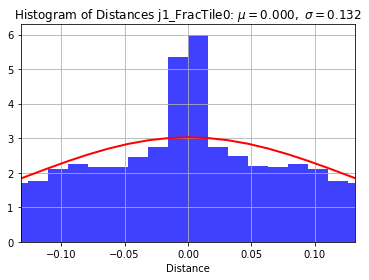

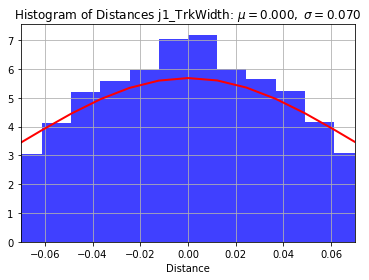

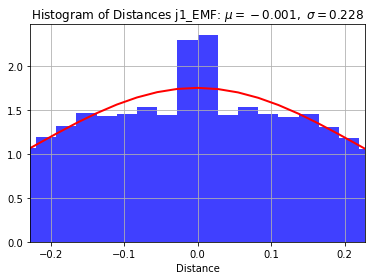

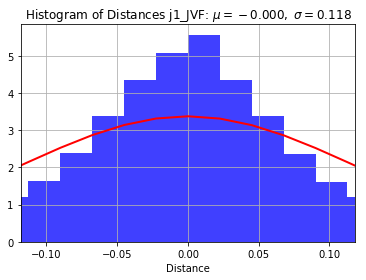

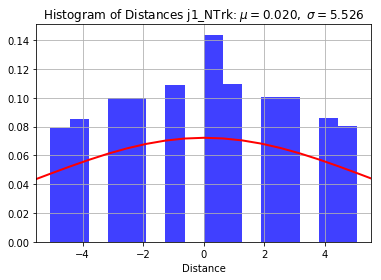

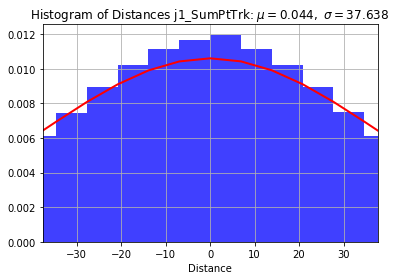

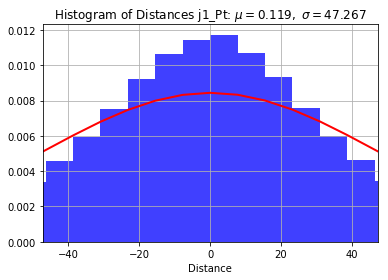

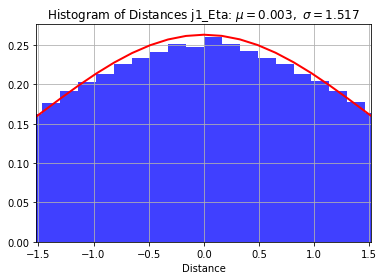

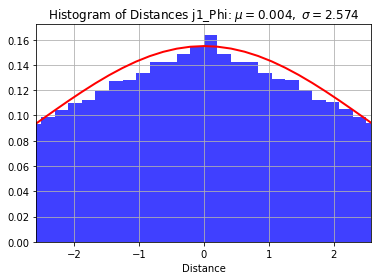

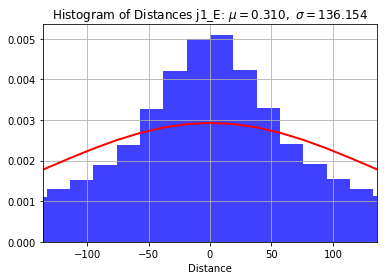

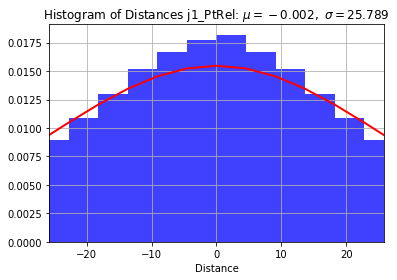

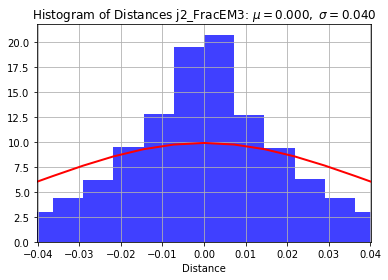

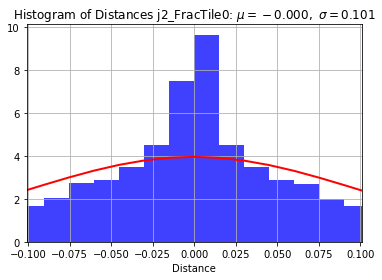

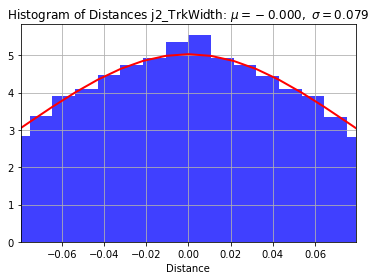

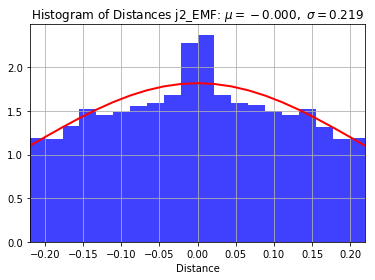

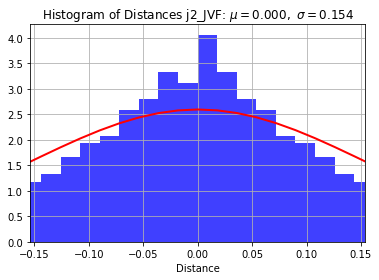

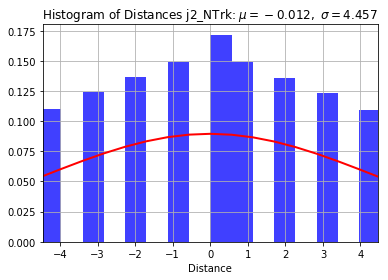

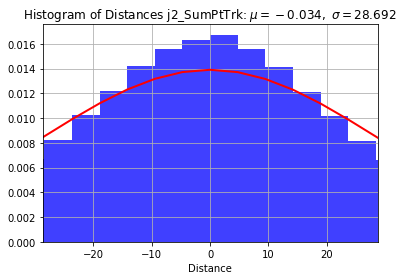

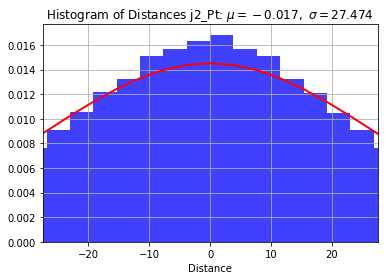

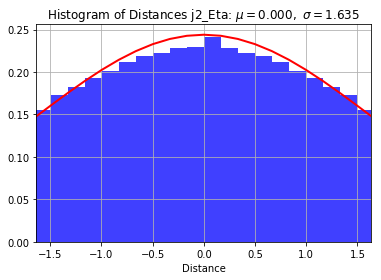

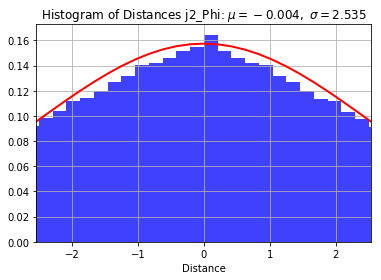

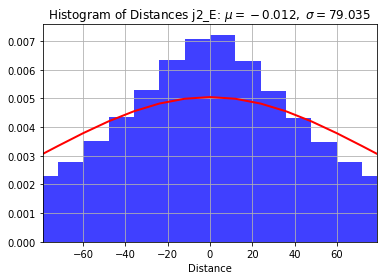

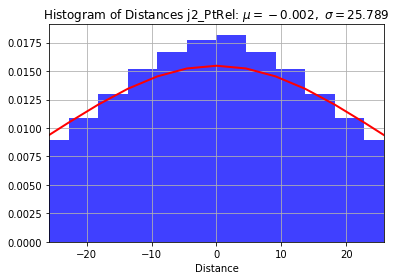

In [25]:
# distance histograms - use to estimate the sigma | better way?
variables = "j1_FracEM3,j1_FracTile0,j1_TrkWidth,j1_EMF,j1_JVF,j1_NTrk,j1_SumPtTrk,j1_Pt,j1_Eta,j1_Phi,j1_E,j1_PtRel,j2_FracEM3,j2_FracTile0,j2_TrkWidth,j2_EMF,j2_JVF,j2_NTrk,j2_SumPtTrk,j2_Pt,j2_Eta,j2_Phi,j2_E,j2_PtRel"
for variable,k in zip(variables.split(','),range(little_data.shape[1])):
    
    for i in range(little_data.shape[0]-1):
        for j in range(little_data.shape[0]):
            dist0 = little_data[i,k]-little_data[j,k]
            #dist1 = abs(little_data[i,k]-little_data[j,k])
            dataBuffer0 = np.array([dist0])
            #dataBuffer1 = np.array([dist1])
            if i==0:
                data0 = dataBuffer0
                #data1 = dataBuffer1
            else:
                data0 = np.append(data0,dataBuffer0, axis=0)
                #data1 = np.append(data1,dataBuffer1, axis=0)
                
    # best fit of data
    (mu, sigma) = norm.fit(data0)
    
    n, bins, patches = plt.hist(data0, 60, normed=1, facecolor='blue', alpha=0.75)
    # add a 'best fit' line
    y = mlab.normpdf( bins, mu, sigma)
    l = plt.plot(bins, y, 'r', linewidth=2)
    plt.xlim()
    #plot
    plt.xlabel('Distance')
    plt.xlim(-sigma,sigma)
    plt.ylabel('')
    plt.title(r'Histogram of Distances '+variable+': $\mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
    plt.grid(True)

    plt.show()

In [14]:
np.std((np.sqrt(2)*np.std(data0))*data[:,1])

0.017941413251055964

In [26]:
for i in range(little_data.shape[0]-1):
    for j in range(little_data.shape[0]):
        dist0 = little_data[i,0]-little_data[j,0]
            #dist1 = abs(little_data[i,k]-little_data[j,k])
        dataBuffer0 = np.array([dist0])
            #dataBuffer1 = np.array([dist1])
        if i==0:
            data0 = dataBuffer0
                #data1 = dataBuffer1
        else:
            data0 = np.append(data0,dataBuffer0, axis=0)
                #data1 = np.append(data1,dataBuffer1, axis=0)

data0

array([ 0.00391168, -0.00057085,  0.        , ...,  0.07913133,
        0.        ,  0.09327807])

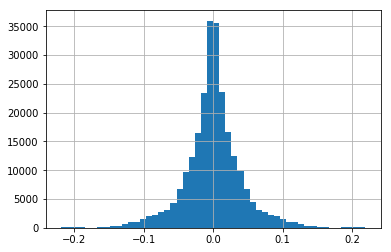

In [45]:
import pandas


pandas.Series(data0).hist(bins=50)

In [3]:

n_clts = 2

k_data = KMeans(n_clusters=n_clts,random_state=0).fit_predict(data)

print metrics.silhouette_score(data,k_data)

list_clusters = []
for i in range(len(np.unique(k_data))):
    list_clusters.append(data[k_data==i])
print ClusterMerits.DispIntraClass(list_clusters)
print ClusterMerits.DispInterClass(list_clusters,data)
print ClusterMerits.DispIntraClass(list_clusters)+ClusterMerits.DispInterClass(list_clusters,data)
print 'F_0', ClusterMerits.DispTotal(data)

0.495927951488
121610573.113
82048134.9918
203658708.105
F_0 203658708.105


functions/ClusterMerits.py:16: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (media == 'm'):


In [1]:
f

ImportError: No module named mvpa2.suite